<a href="https://colab.research.google.com/github/zhaoguangyuan123/239_final/blob/master/run_Gym_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rendering Gym Envs**

Here pyvirtualdisplay and store rgb frame array used while running environment. Environment frames animated using animation feature of matplotlib and HTML function used for Ipython display module. 

In [ ]:
#installing dependencies
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

In [ ]:
import gym
import numpy as np
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()
#env.render()
print('initial observation:', obs)

action = env.action_space.sample()
obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
observation space: Box(4,)
action space: Discrete(2)
initial observation: [ 0.02971243 -0.03682238  0.03320088  0.01032362]
next observation: [ 0.02897598 -0.23240435  0.03340735  0.31329417]
reward: 1.0
done: False
info: {}


In [ ]:
# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

test episode: 0 R: 16.0
test episode: 1 R: 16.0
test episode: 2 R: 9.0


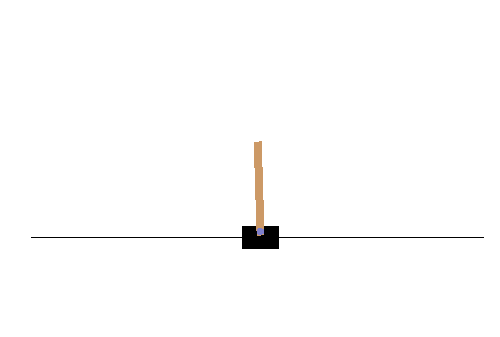

In [ ]:
frames = []
for i in range(3):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        frames.append(env.render(mode = 'rgb_array'))
        obs, r, done, _ = env.step(env.action_space.sample())
        R += r
        t += 1
    print('test episode:', i, 'R:', R)
 
env.render()

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

In [ ]:
# wrap env for recording video
envw = gym.wrappers.Monitor(env, "./", force=True)

for i in range(3):
    obs = envw.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        envw.render()
        obs, r, done, _ = envw.step(env.action_space.sample())
        R += r
        t += 1
    print('test episode:', i, 'R:', R)
 

test episode: 0 R: 13.0
test episode: 1 R: 14.0
test episode: 2 R: 26.0


In [ ]:
#saving video
from google.colab import files
import glob

for file in glob.glob("openaigym.video.*.mp4"):
  files.download(file)

In [ ]:
#remove video to free memory
!rm openaigym.video.*